# 1. Importing necessary packages

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import pylab
from sklearn.preprocessing import StandardScaler, scale,MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pickle as pkl
import joblib

# 2. Importing dataset

In [2]:
df = pd.read_excel(r"C:\Users\Hp\Desktop\Intership\Logistics\Cleaned file.xlsx")
df

,Unnamed: 0,ID,ASN/DN #,Country,shipment_Mode,item_description,Brand,Dosage,unit_of_Measure_(Per_Pack),line_Item_Quantity,line_Item_Value,pack_Price,unit_Price,manufacturing_Site,first_Line_Designation,weight_in_kg,freight_Cost_USD,line_Item_Insurance_(USD)
0,0,1,ASN-8,Côte d'Ivoire,Air,Test kits,Reveal,NaN,30,19,551.00,29.00,0.97,India,Yes,13,780.34,0.00
1,1,3,ASN-85,Vietnam,Air,Bottled medicine,Generic,10mg/ml,240,1000,6200.00,6.20,0.03,India,Yes,358,4521.50,0.00
2,2,4,ASN-14,Côte d'Ivoire,Air,Test kits,Determine,NaN,100,500,40000.00,80.00,0.80,Germany,Yes,171,1653.78,0.00
3,3,15,ASN-50,Vietnam,Air,Tablets,Generic,150mg,60,31920,127360.80,3.99,0.07,India,Yes,1855,16007.06,0.00
4,4,16,ASN-55,Vietnam,Air,Capsule,Generic,30mg,60,38000,121600.00,3.20,0.05,India,Yes,7590,45450.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,2148,86207,DN-4283,"Congo, DRC",Air,Tablets,Generic,600mg,30,9800,30576.00,3.12,0.10,India,No,11969,30576.00,35.99
10320,2149,84475,DN-4283,"Congo, DRC",Air,Tablets,Generic,150/300/200mg,60,14329,110619.88,7.72,0.13,India,No,11969,110619.88,130.20
10321,2344,86603,DN-3324,Nigeria,Air Charter,Tablets,Generic,150/300/200mg,60,160000,1372800.00,8.58,0.14,India,No,11969,41352.75,1698.15
10322,2345,86602,DN-3324,Nigeria,Air Charter,Tablets,Generic,150/300/200mg,60,7456,63972.48,8.58,0.14,India,No,11969,41352.75,79.13


In [3]:
df.rename(columns ={'unit_of_Measure_(Per_Pack)': 'Unit_measure','line_Item_Insurance_(USD)': 'Insurance_amount'},inplace=True)

# 3.Dropping unwanted columns

In [4]:
df.drop(columns=['Unnamed: 0','ID','ASN/DN #','Dosage'],inplace=True)

In [5]:
df

,Country,shipment_Mode,item_description,Brand,Unit_measure,line_Item_Quantity,line_Item_Value,pack_Price,unit_Price,manufacturing_Site,first_Line_Designation,weight_in_kg,freight_Cost_USD,Insurance_amount
0,Côte d'Ivoire,Air,Test kits,Reveal,30,19,551.00,29.00,0.97,India,Yes,13,780.34,0.00
1,Vietnam,Air,Bottled medicine,Generic,240,1000,6200.00,6.20,0.03,India,Yes,358,4521.50,0.00
2,Côte d'Ivoire,Air,Test kits,Determine,100,500,40000.00,80.00,0.80,Germany,Yes,171,1653.78,0.00
3,Vietnam,Air,Tablets,Generic,60,31920,127360.80,3.99,0.07,India,Yes,1855,16007.06,0.00
4,Vietnam,Air,Capsule,Generic,60,38000,121600.00,3.20,0.05,India,Yes,7590,45450.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,"Congo, DRC",Air,Tablets,Generic,30,9800,30576.00,3.12,0.10,India,No,11969,30576.00,35.99
10320,"Congo, DRC",Air,Tablets,Generic,60,14329,110619.88,7.72,0.13,India,No,11969,110619.88,130.20
10321,Nigeria,Air Charter,Tablets,Generic,60,160000,1372800.00,8.58,0.14,India,No,11969,41352.75,1698.15
10322,Nigeria,Air Charter,Tablets,Generic,60,7456,63972.48,8.58,0.14,India,No,11969,41352.75,79.13


# 4. Encoding categorical variables using label encoder

In [6]:
enc = LabelEncoder()
df.Country = enc.fit_transform(df.Country)
df.shipment_Mode = enc.fit_transform(df.shipment_Mode)
df.item_description = enc.fit_transform(df.item_description)
df.Brand = enc.fit_transform(df.Brand)
df.manufacturing_Site = enc.fit_transform(df.manufacturing_Site)
df.first_Line_Designation = enc.fit_transform(df.first_Line_Designation)

In [7]:
#joblib.dump(enc,r"C:\Users\Hp\Desktop\Intership\Logistics\Models\enc.sav",'')

In [8]:
fp = open(r"C:\Users\Hp\Desktop\Intership\Logistics\Models\enc.pkl","wb")
pkl.dump(enc,fp)
fp.close()

# 5. Feature engineering

### a. removing multicollinearity

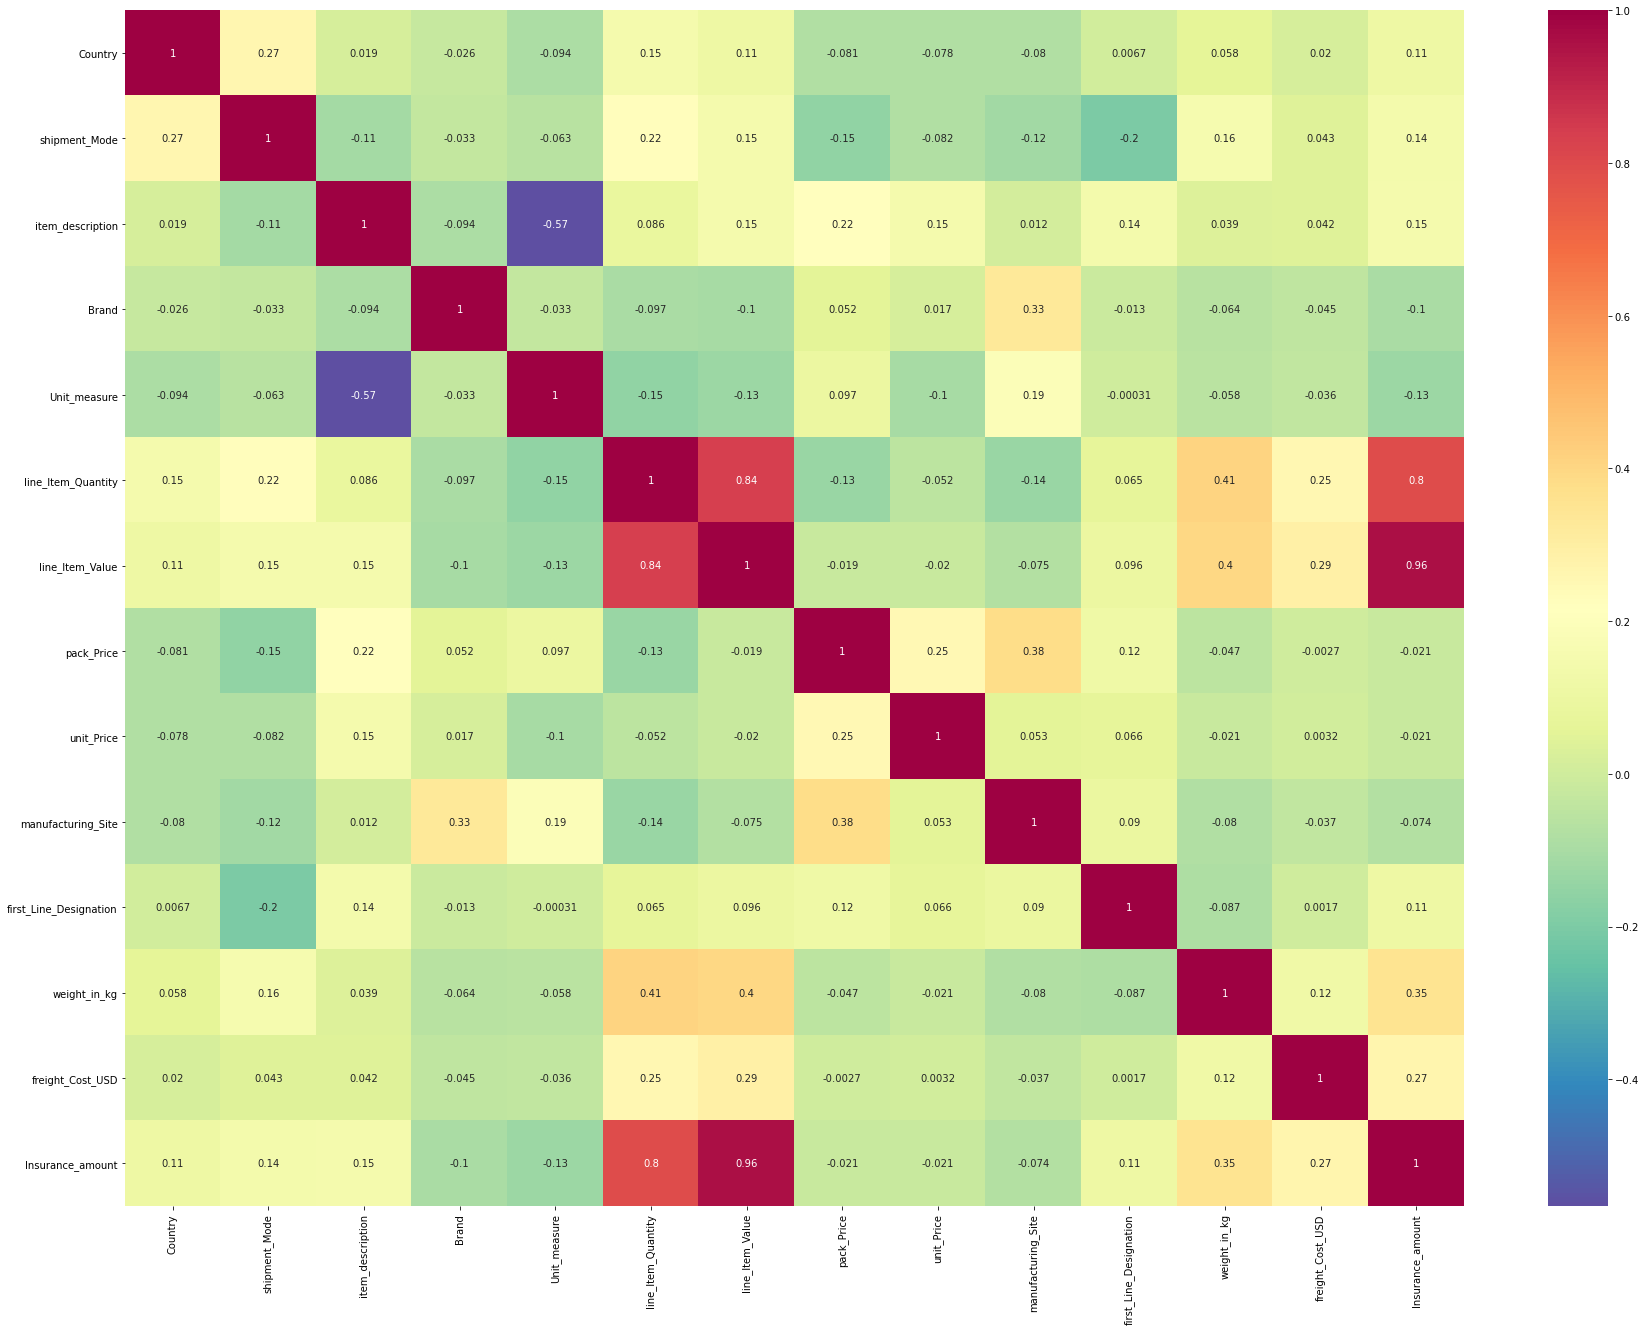

In [9]:
plt.rcParams["figure.figsize"] = 30,22
plt.rcParams["figure.facecolor"] = "white"
corrilation_Ind_features = df.corr()
sns.heatmap(corrilation_Ind_features,annot=True,cmap= "Spectral_r")
plt.show()

In [10]:
drop_col_names = set()

for i in range(len(corrilation_Ind_features.columns)):
    for j in range(i):
        if abs(corrilation_Ind_features.iloc[i,j]) > 0.8:
            col_name = corrilation_Ind_features.columns[i]
            drop_col_names.add(col_name)

In [11]:
drop_col_names

{'Insurance_amount', 'line_Item_Value'}

In [12]:
df.drop(columns=['line_Item_Value'],inplace=True)

### b. removing columns with less corelation with the target varible

In [13]:
df.columns

Index(['Country', 'shipment_Mode', 'item_description', 'Brand', 'Unit_measure',
       'line_Item_Quantity', 'pack_Price', 'unit_Price', 'manufacturing_Site',
       'first_Line_Designation', 'weight_in_kg', 'freight_Cost_USD',
       'Insurance_amount'],
      dtype='object')

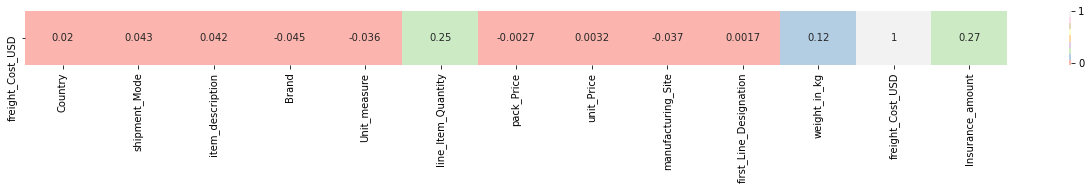

In [14]:
plt.rcParams["figure.figsize"] = 22,1
corrilation_depend = df.corr()
sns.heatmap(corrilation_depend.loc[['freight_Cost_USD'],:],annot=True,cmap= "Pastel1")
plt.show()

In [15]:
drop_col_names = []
for x,i in enumerate(corrilation_depend["freight_Cost_USD"]):
    if abs(i) < 0.04:
        print(i,"   ",corrilation_depend.columns[x])
        drop_col_names.append(corrilation_depend.columns[x])

0.020443326779005892     Country
-0.03615309608832031     Unit_measure
-0.0027481484257140683     pack_Price
0.0032247503658404957     unit_Price
-0.03714662200129991     manufacturing_Site
0.001749842517619356     first_Line_Designation


In [16]:
df.drop(columns=['pack_Price','unit_Price'],inplace=True)

In [17]:
df.columns

Index(['Country', 'shipment_Mode', 'item_description', 'Brand', 'Unit_measure',
       'line_Item_Quantity', 'manufacturing_Site', 'first_Line_Designation',
       'weight_in_kg', 'freight_Cost_USD', 'Insurance_amount'],
      dtype='object')

In [18]:
df

,Country,shipment_Mode,item_description,Brand,Unit_measure,line_Item_Quantity,manufacturing_Site,first_Line_Designation,weight_in_kg,freight_Cost_USD,Insurance_amount
0,9,0,5,33,30,19,7,1,13,780.34,0.00
1,40,0,1,15,240,1000,7,1,358,4521.50,0.00
2,9,0,5,11,100,500,5,1,171,1653.78,0.00
3,40,0,4,15,60,31920,7,1,1855,16007.06,0.00
4,40,0,2,15,60,38000,7,1,7590,45450.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...
10319,8,0,4,15,30,9800,7,0,11969,30576.00,35.99
10320,8,0,4,15,60,14329,7,0,11969,110619.88,130.20
10321,28,1,4,15,60,160000,7,0,11969,41352.75,1698.15
10322,28,1,4,15,60,7456,7,0,11969,41352.75,79.13


### c. Normalising the data

In [19]:
plt.rcParams["figure.figsize"] = 10,5
def plotfigure(df,feature):
    print("\n\nskewness of the ",feature," is : ",stats.skew(df[feature]))
    print("kurtosis of the ",feature," is : ",stats.kurtosis(df[feature]))
    plt.subplot(1,2,1)
    sns.distplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[feature],plot=pylab)
    plt.show()
    
    
def line():
    print("\033[1m" + "_________________________________________________________________________________________________________"+ "\033[0m")


                             C̲o̲u̲n̲t̲r̲y:


skewness of the  Country  is :  -0.5243715450683168
kurtosis of the  Country  is :  -1.0978151634164155


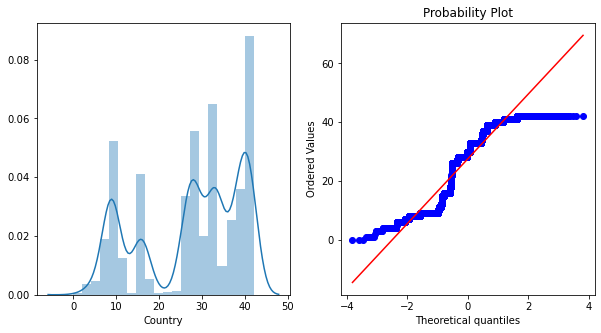

_________________________________________________________________________________________________________

                             s̲h̲i̲p̲m̲e̲n̲t̲_̲M̲o̲d̲e:


skewness of the  shipment_Mode  is :  0.7692660101705115
kurtosis of the  shipment_Mode  is :  -1.2943971287578477


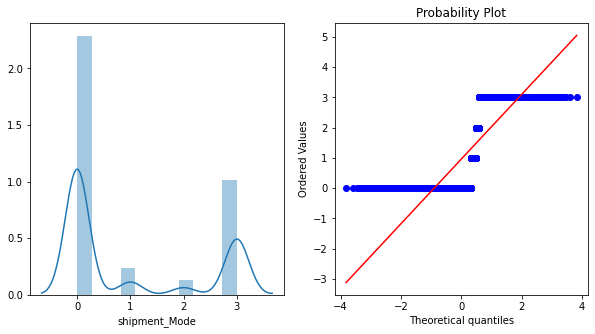

_________________________________________________________________________________________________________

                             i̲t̲e̲m̲_̲d̲e̲s̲c̲r̲i̲p̲t̲i̲o̲n:


skewness of the  item_description  is :  -1.2860199334320435
kurtosis of the  item_description  is :  0.8144147496897292


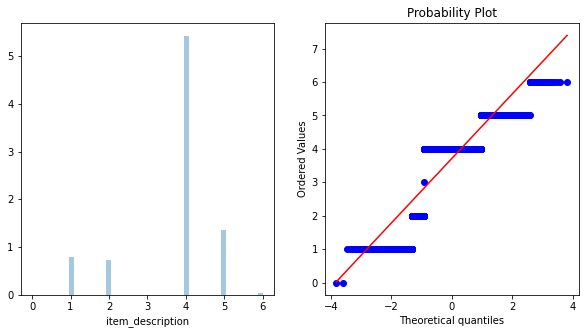

_________________________________________________________________________________________________________

                             B̲r̲a̲n̲d:


skewness of the  Brand  is :  1.6528614282014669
kurtosis of the  Brand  is :  3.0756785516527225


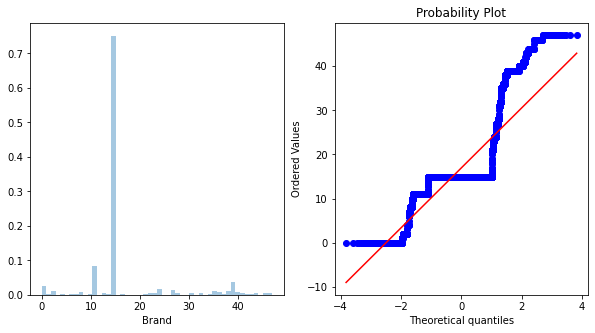

_________________________________________________________________________________________________________

                             U̲n̲i̲t̲_̲m̲e̲a̲s̲u̲r̲e:


skewness of the  Unit_measure  is :  4.301877340082513
kurtosis of the  Unit_measure  is :  36.07593938961278


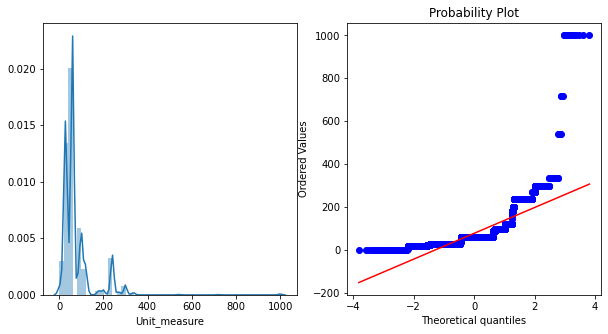

_________________________________________________________________________________________________________

                             l̲i̲n̲e̲_̲I̲t̲e̲m̲_̲Q̲u̲a̲n̲t̲i̲t̲y:


skewness of the  line_Item_Quantity  is :  5.037582639814305
kurtosis of the  line_Item_Quantity  is :  40.03032492150764


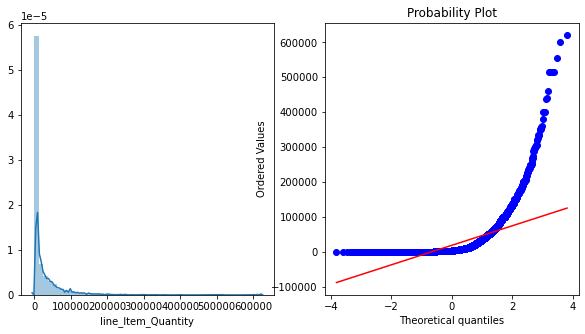

_________________________________________________________________________________________________________

                             m̲a̲n̲u̲f̲a̲c̲t̲u̲r̲i̲n̲g̲_̲S̲i̲t̲e:


skewness of the  manufacturing_Site  is :  2.472576410592607
kurtosis of the  manufacturing_Site  is :  5.770933949639501


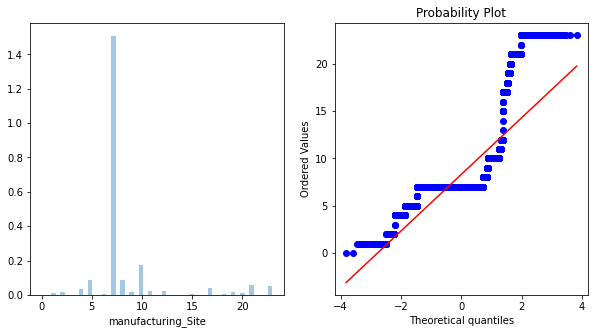

_________________________________________________________________________________________________________

                             f̲i̲r̲s̲t̲_̲L̲i̲n̲e̲_̲D̲e̲s̲i̲g̲n̲a̲t̲i̲o̲n:


skewness of the  first_Line_Designation  is :  -0.7763676086969418
kurtosis of the  first_Line_Designation  is :  -1.397253336166192


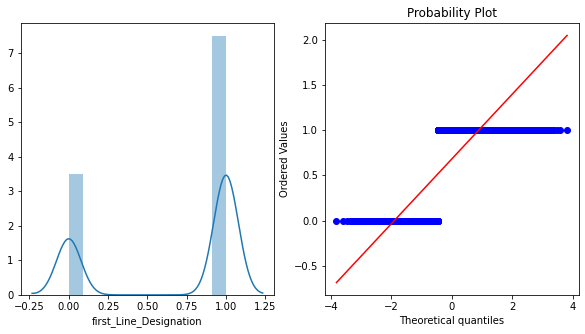

_________________________________________________________________________________________________________

                             w̲e̲i̲g̲h̲t̲_̲i̲n̲_̲k̲g:


skewness of the  weight_in_kg  is :  34.73752229285201
kurtosis of the  weight_in_kg  is :  2197.17952938069


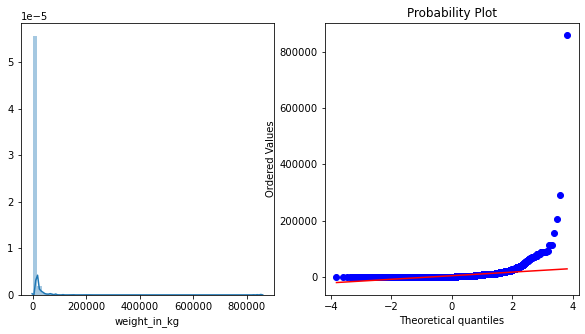

_________________________________________________________________________________________________________

                             f̲r̲e̲i̲g̲h̲t̲_̲C̲o̲s̲t̲_̲U̲S̲D:


skewness of the  freight_Cost_USD  is :  24.12504330226273
kurtosis of the  freight_Cost_USD  is :  961.6834736896667


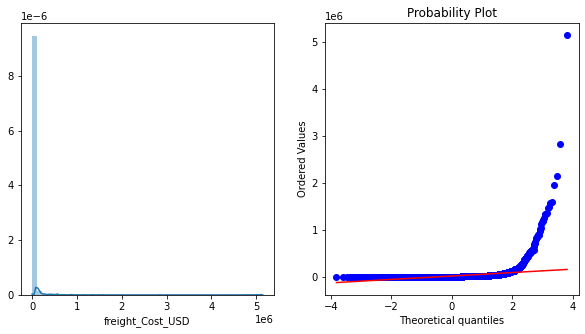

_________________________________________________________________________________________________________

                             I̲n̲s̲u̲r̲a̲n̲c̲e̲_̲a̲m̲o̲u̲n̲t:


skewness of the  Insurance_amount  is :  4.885590322657202
kurtosis of the  Insurance_amount  is :  35.746184106808734


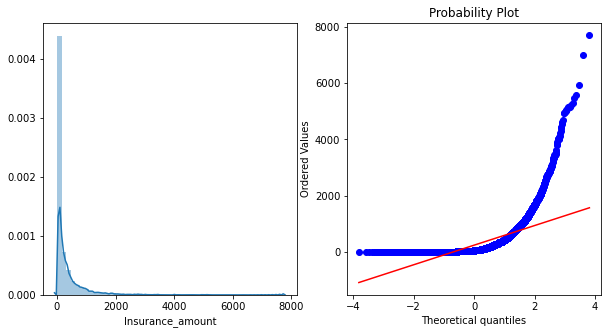

_________________________________________________________________________________________________________


In [20]:
for i in df.columns:
    print("\n                            ","\033[1m" + "\u0332".join(i)+ ":" + "\033[0m")
    plotfigure(df,i)
    line()

-> Here the continous features are unit_of_Measure_(Per_Pack), line_Item_Quantity,weight_in_kg, line_Item_Insurance_(USD). We have to normalize the continous variable if they are not in range  

In [21]:
# Normalization converts all data points to decimals between 0 and 1. If the min is 0, simply divide each point by the max.
#If the min is not 0, subtract the min from each point, and then divide by the min-max difference.

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

#### a.  unit_of_Measure_(Per_Pack)

skewness :  0.62327729658594
Kurtosis :  -0.9377254635054872


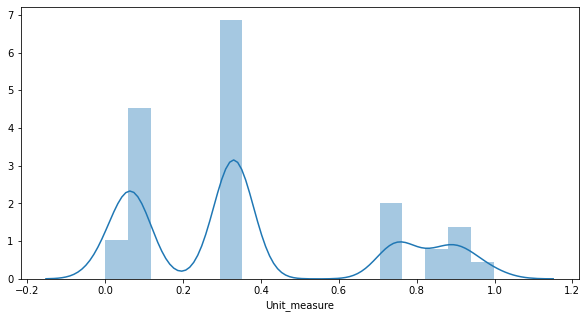

In [22]:
size = len(df['Unit_measure'])-1
helpful_percentile_linearization = df['Unit_measure'].rank(method='min').apply(lambda x: (x-1)/size)
print('skewness : ',stats.skew(helpful_percentile_linearization))
print('Kurtosis : ',stats.kurtosis(helpful_percentile_linearization))
sns.distplot(helpful_percentile_linearization)


-> Here the beter result is obatined with Percentile linearization.

In [23]:
df['Unit_measure'] = (df['Unit_measure'].rank(method='min').apply(lambda x: (x-1)/size))

In [24]:
#joblib.dump(log_1,r"C:\Users\Hp\Desktop\Intership\Logistics\Models\unitmeasure")

#### b. line_Item_Quantity

13.337473144116748
skewness :  -0.12352744000238197
Kurtosis :  -0.6539327907217971


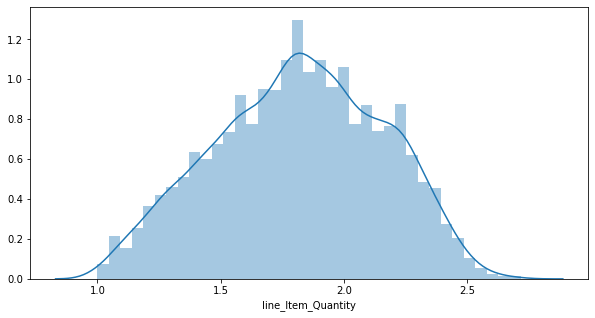

In [25]:
log_max = np.log(df.line_Item_Quantity).max()
print(log_max)
log_root= (df.line_Item_Quantity) ** (1/log_max)
print('skewness : ',stats.skew(log_root))
print('Kurtosis : ',stats.kurtosis(log_root))
sns.distplot(log_root)

-> Here log_root gives the better result

In [26]:
log_max = np.log(df.line_Item_Quantity).max()
df.line_Item_Quantity= (df.line_Item_Quantity) ** (1/log_max)


In [27]:
#log_max = np.log(df.line_Item_Quantity).max()
#log_root= (df.line_Item_Quantity) ** (1/log_max)
#joblib.dump(log_root,r"C:\Users\Hp\Desktop\Intership\Logistics\Models\lineitemq")

### c. weight_in_kg

skewness :  -0.416780112781048
Kurtosis :  -0.09582388702491107


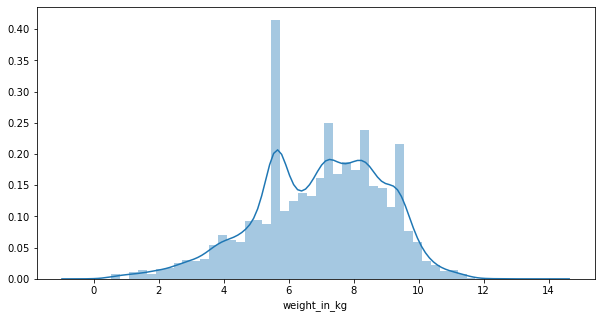

In [28]:
log_ = np.log1p(df.weight_in_kg) 
print('skewness : ',stats.skew(log_))
print('Kurtosis : ',stats.kurtosis(log_))
sns.distplot(log_)

-> Better result is obtained from log transformation

In [29]:
df.weight_in_kg = (np.log1p(df.weight_in_kg))

In [30]:
#joblib.dump(log_,r"C:\Users\Hp\Desktop\Intership\Logistics\Models\weight")

#### d. line_Item_Insurance_(USD)

8.950071111454612
skewness :  -0.7543788926325921
Kurtosis :  1.0637150584266504


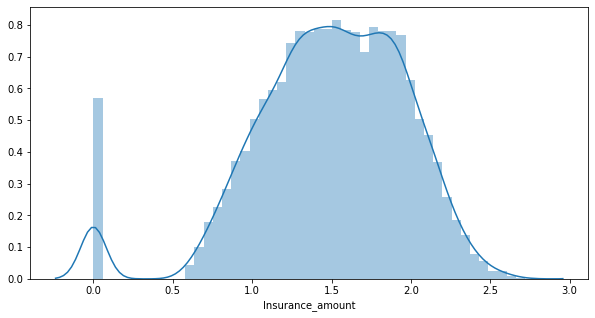

In [31]:
log_max = np.log(df['Insurance_amount']).max()
print(log_max)
log_root= (df['Insurance_amount']) ** (1/log_max)
print('skewness : ',stats.skew(log_root))
print('Kurtosis : ',stats.kurtosis(log_root))
sns.distplot(log_root)

-> log_root has the better result

In [32]:
log_max = np.log(df['Insurance_amount']).max()
df['Insurance_amount']= (df['Insurance_amount']) ** (1/log_max)

In [33]:
#log_max = np.log(df['Insurance_amount']).max()
#log_root= (df['Insurance_amount']) ** (1/log_max)
#joblib.dump(log_root,r"C:\Users\Hp\Desktop\Intership\Logistics\Models\insurance")

#### e. freight_Cost_USD

In [34]:
df

,Country,shipment_Mode,item_description,Brand,Unit_measure,line_Item_Quantity,manufacturing_Site,first_Line_Designation,weight_in_kg,freight_Cost_USD,Insurance_amount
0,9,0,5,33,0.071103,1.247030,7,1,2.639057,780.34,0.000000
1,40,0,1,15,0.908360,1.678534,7,1,5.883322,4521.50,0.000000
2,9,0,5,11,0.752688,1.593529,5,1,5.147494,1653.78,0.000000
3,40,0,4,15,0.329846,2.176205,7,1,7.526179,16007.06,0.000000
4,40,0,2,15,0.329846,2.204840,7,1,8.934719,45450.08,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
10319,8,0,4,15,0.071103,1.991815,7,0,9.390159,30576.00,1.492360
10320,8,0,4,15,0.329846,2.049366,7,0,9.390159,110619.88,1.722929
10321,28,1,4,15,0.329846,2.455771,7,0,9.390159,41352.75,2.295558
10322,28,1,4,15,0.329846,1.951407,7,0,9.390159,41352.75,1.629684


skewness :  -0.6066366445618553
Kurtosis :  1.918802503913195


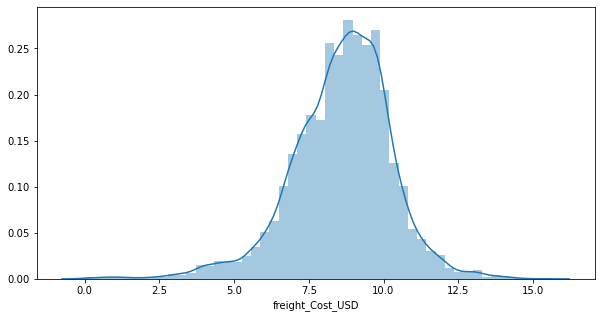

In [36]:
log_ = np.log1p(df.freight_Cost_USD) 
print('skewness : ',stats.skew(log_))
print('Kurtosis : ',stats.kurtosis(log_))
sns.distplot(log_)

In [40]:
#df.freight_Cost_USD = normalize(np.log1p(df.freight_Cost_USD) )

In [41]:
df.freight_Cost_USD = (np.log1p(df.freight_Cost_USD) )

### d. Removing outliers

#### 1. unit_of_Measure_(Per_Pack)

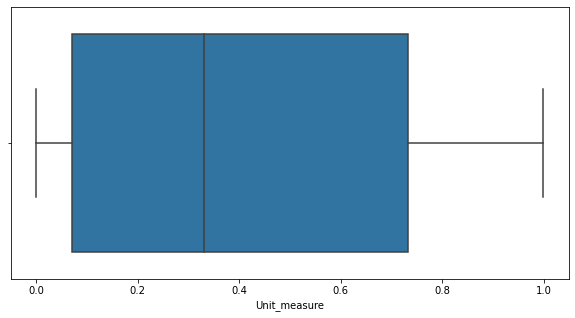

In [43]:
plt.figure(figsize=[10,5])
sns.boxplot(df['Unit_measure'])
plt.show()

#### 2. line_Item_Quantity

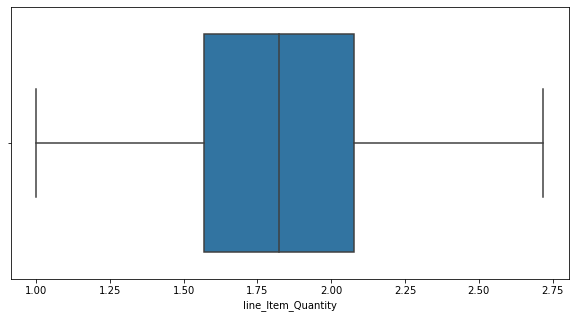

In [44]:
plt.figure(figsize=[10,5])
sns.boxplot(df.line_Item_Quantity)
plt.show()

In [45]:
IQR = df.line_Item_Quantity.quantile(0.75)- df.line_Item_Quantity.quantile(0.25)
print('IQR = ', IQR)
lower_bridge = df.line_Item_Quantity.quantile(0.25) - (IQR*1.5)
upper_bridge = df.line_Item_Quantity.quantile(0.75) + (IQR*1.5)
print('Lower_bridge = ', lower_bridge)
print('Upper_bridge  = ', upper_bridge)


IQR =  0.5067435968830754
Lower_bridge =  0.8093029978866061
Upper_bridge  =  2.8362773854189074


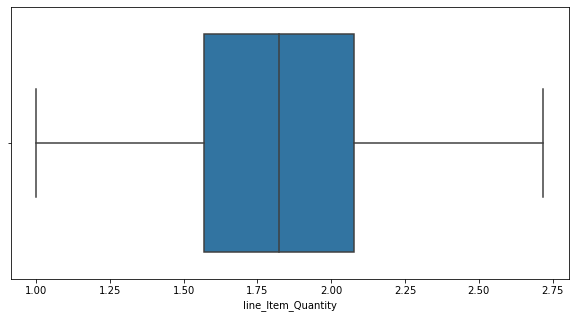

In [46]:
df = df[df.line_Item_Quantity> lower_bridge]
plt.figure(figsize=[10,5])
sns.boxplot(df.line_Item_Quantity)
plt.show()

#### 4. weight_in_kg

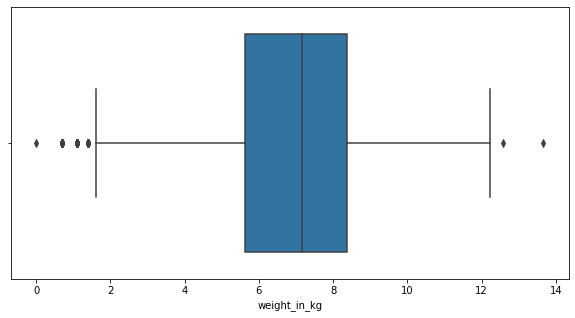

In [47]:
plt.figure(figsize=[10,5])
sns.boxplot(df['weight_in_kg'])
plt.show()

In [48]:
IQR = df['weight_in_kg'].quantile(0.75)- df['weight_in_kg'].quantile(0.25)
print('IQR = ', IQR)
lower_bridge = df['weight_in_kg'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['weight_in_kg'].quantile(0.75) + (IQR*1.5)
print('Lower_bridge = ', lower_bridge)
print('Upper_bridge  = ', upper_bridge)

IQR =  2.760972602556553
Lower_bridge =  1.4789419618823203
Upper_bridge  =  12.522832372108532


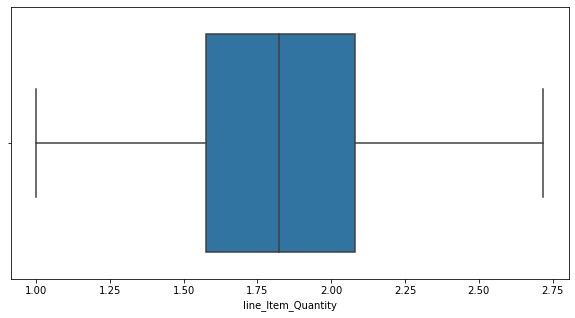

In [49]:
df = df[(df['weight_in_kg']> lower_bridge) & (df['weight_in_kg'] < upper_bridge)]
plt.figure(figsize=[10,5])
sns.boxplot(df.line_Item_Quantity)
plt.show()

#### 4.  line_Item_Insurance_(USD)

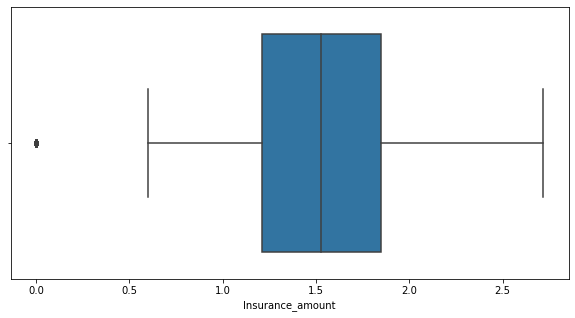

In [50]:
plt.figure(figsize=[10,5])
sns.boxplot(df['Insurance_amount'])
plt.show()

In [51]:
IQR = df['Insurance_amount'].quantile(0.75)- df['Insurance_amount'].quantile(0.25)
print('IQR = ', IQR)
lower_bridge = df['Insurance_amount'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Insurance_amount'].quantile(0.75) + (IQR*1.5)
print('Lower_bridge = ', lower_bridge)
print('Upper_bridge  = ', upper_bridge)

IQR =  0.6399504539841832
Lower_bridge =  0.2496502182869761
Upper_bridge  =  2.8094520342237086


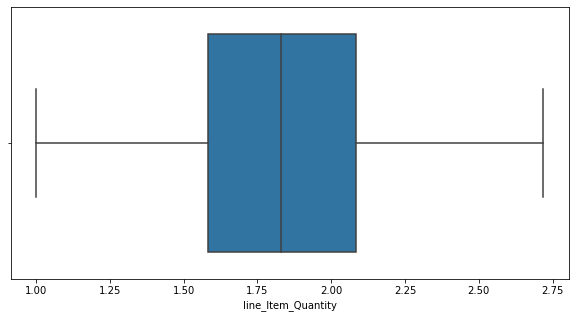

In [52]:
df = df[(df['Insurance_amount']> lower_bridge) & (df['Insurance_amount'] < upper_bridge)]
plt.figure(figsize=[10,5])
sns.boxplot(df.line_Item_Quantity)
plt.show()

# 6. Splitting the data into x and y

In [54]:
x = df.drop(columns=['freight_Cost_USD'])
std = StandardScaler()
min_max = MinMaxScaler()

x = min_max.fit_transform(x)
y = df.freight_Cost_USD
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [55]:
joblib.dump(min_max,r"C:\Users\Hp\Desktop\Intership\Logistics\Models\min.sav")

['C:\\Users\\Hp\\Desktop\\Intership\\Logistics\\Models\\min.sav']

# 7. Modelling

### a. LinearRegression

In [56]:
model_1 = LinearRegression()
model_1.fit(x_train,y_train)
y_predict=model_1.predict(x_test)
print(mean_squared_error(y_true=y_test,y_pred=y_predict))
print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
print(r2_score(y_true=y_test, y_pred=y_predict))

1.0599178092908623
0.7454058260537133
0.6144677067809576


### b. XGboost regressor

In [57]:
model_2 = XGBRegressor()
model_2.fit(x_train,y_train)
y_predict=model_2.predict(x_test)
print(mean_squared_error(y_true=y_test,y_pred=y_predict))
print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
print(r2_score(y_true=y_test, y_pred=y_predict))

0.467344777281096
0.4506876878596508
0.8300089854800434


### c. XGBRF regressor

In [58]:
model_3 =XGBRFRegressor()
model_3.fit(x_train,y_train)
y_predict=model_3.predict(x_test)
print(mean_squared_error(y_true=y_test,y_pred=y_predict))
print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
print(r2_score(y_true=y_test, y_pred=y_predict))

0.5688861173103199
0.5246554160977197
0.7930745502485108


### d. Random forest

In [59]:
model_4 = RandomForestRegressor(random_state=43)
model_4.fit(x_train,y_train)
y_predict=model_4.predict(x_test)
print(mean_squared_error(y_true=y_test,y_pred=y_predict))
print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
print(r2_score(y_true=y_test, y_pred=y_predict))
#y_predict = np.expm1(y_predict)

0.4114743681649461
0.40661468222372893
0.8503311715597797


In [60]:
print(y_predict)

[7.22020317 7.5111991  6.96339788 ... 9.13903715 9.18762595 8.81501683]


In [61]:
y_predict = np.expm1(y_predict)
y_predict

array([1365.7667195 , 1827.40467493, 1056.21976591, ..., 9310.79499596,
       9774.41610352, 6733.62107369])

### e. catboost

In [62]:
model_5 = CatBoostRegressor()
model_5.fit(x_train,y_train)
y_predict=model_5.predict(x_test)
print(mean_squared_error(y_true=y_test,y_pred=y_predict))
print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
print(r2_score(y_true=y_test, y_pred=y_predict))

Learning rate set to 0.056424
0:	learn: 1.5857667	total: 125ms	remaining: 2m 5s
1:	learn: 1.5319634	total: 130ms	remaining: 1m 4s
2:	learn: 1.4812871	total: 134ms	remaining: 44.5s
3:	learn: 1.4343268	total: 137ms	remaining: 34.1s
4:	learn: 1.3902602	total: 140ms	remaining: 27.9s
5:	learn: 1.3496595	total: 143ms	remaining: 23.6s
6:	learn: 1.3119207	total: 145ms	remaining: 20.6s
7:	learn: 1.2774973	total: 148ms	remaining: 18.4s
8:	learn: 1.2433616	total: 151ms	remaining: 16.6s
9:	learn: 1.2131665	total: 154ms	remaining: 15.3s
10:	learn: 1.1852864	total: 158ms	remaining: 14.2s
11:	learn: 1.1589051	total: 160ms	remaining: 13.2s
12:	learn: 1.1343740	total: 166ms	remaining: 12.6s
13:	learn: 1.1129814	total: 169ms	remaining: 11.9s
14:	learn: 1.0933130	total: 172ms	remaining: 11.3s
15:	learn: 1.0743781	total: 175ms	remaining: 10.8s
16:	learn: 1.0568455	total: 178ms	remaining: 10.3s
17:	learn: 1.0384689	total: 181ms	remaining: 9.89s
18:	learn: 1.0250504	total: 184ms	remaining: 9.51s
19:	learn: 

200:	learn: 0.7072948	total: 679ms	remaining: 2.7s
201:	learn: 0.7068195	total: 682ms	remaining: 2.69s
202:	learn: 0.7061775	total: 685ms	remaining: 2.69s
203:	learn: 0.7056561	total: 688ms	remaining: 2.68s
204:	learn: 0.7050625	total: 690ms	remaining: 2.68s
205:	learn: 0.7046985	total: 693ms	remaining: 2.67s
206:	learn: 0.7040306	total: 696ms	remaining: 2.67s
207:	learn: 0.7036876	total: 699ms	remaining: 2.66s
208:	learn: 0.7033574	total: 702ms	remaining: 2.66s
209:	learn: 0.7029488	total: 704ms	remaining: 2.65s
210:	learn: 0.7024818	total: 707ms	remaining: 2.65s
211:	learn: 0.7020289	total: 710ms	remaining: 2.64s
212:	learn: 0.7016852	total: 713ms	remaining: 2.63s
213:	learn: 0.7014144	total: 716ms	remaining: 2.63s
214:	learn: 0.7009589	total: 718ms	remaining: 2.62s
215:	learn: 0.7006371	total: 721ms	remaining: 2.62s
216:	learn: 0.7003360	total: 724ms	remaining: 2.61s
217:	learn: 0.6999096	total: 726ms	remaining: 2.6s
218:	learn: 0.6993336	total: 729ms	remaining: 2.6s
219:	learn: 0.6

391:	learn: 0.6432822	total: 1.19s	remaining: 1.84s
392:	learn: 0.6430828	total: 1.19s	remaining: 1.84s
393:	learn: 0.6428516	total: 1.2s	remaining: 1.84s
394:	learn: 0.6426260	total: 1.2s	remaining: 1.83s
395:	learn: 0.6424611	total: 1.2s	remaining: 1.83s
396:	learn: 0.6422195	total: 1.2s	remaining: 1.83s
397:	learn: 0.6419317	total: 1.21s	remaining: 1.82s
398:	learn: 0.6417695	total: 1.21s	remaining: 1.82s
399:	learn: 0.6414819	total: 1.21s	remaining: 1.82s
400:	learn: 0.6413394	total: 1.21s	remaining: 1.81s
401:	learn: 0.6412134	total: 1.22s	remaining: 1.81s
402:	learn: 0.6408800	total: 1.22s	remaining: 1.8s
403:	learn: 0.6407816	total: 1.22s	remaining: 1.8s
404:	learn: 0.6406125	total: 1.22s	remaining: 1.8s
405:	learn: 0.6405144	total: 1.23s	remaining: 1.79s
406:	learn: 0.6402959	total: 1.23s	remaining: 1.79s
407:	learn: 0.6400792	total: 1.23s	remaining: 1.79s
408:	learn: 0.6399056	total: 1.23s	remaining: 1.78s
409:	learn: 0.6396797	total: 1.24s	remaining: 1.78s
410:	learn: 0.63952

590:	learn: 0.6055854	total: 1.7s	remaining: 1.18s
591:	learn: 0.6054269	total: 1.71s	remaining: 1.18s
592:	learn: 0.6053561	total: 1.71s	remaining: 1.17s
593:	learn: 0.6051612	total: 1.71s	remaining: 1.17s
594:	learn: 0.6049761	total: 1.71s	remaining: 1.17s
595:	learn: 0.6048497	total: 1.72s	remaining: 1.16s
596:	learn: 0.6047461	total: 1.72s	remaining: 1.16s
597:	learn: 0.6046397	total: 1.72s	remaining: 1.16s
598:	learn: 0.6045139	total: 1.73s	remaining: 1.16s
599:	learn: 0.6043087	total: 1.73s	remaining: 1.15s
600:	learn: 0.6041088	total: 1.73s	remaining: 1.15s
601:	learn: 0.6039327	total: 1.73s	remaining: 1.15s
602:	learn: 0.6037761	total: 1.74s	remaining: 1.14s
603:	learn: 0.6035508	total: 1.74s	remaining: 1.14s
604:	learn: 0.6034619	total: 1.74s	remaining: 1.14s
605:	learn: 0.6032611	total: 1.74s	remaining: 1.13s
606:	learn: 0.6030666	total: 1.75s	remaining: 1.13s
607:	learn: 0.6029470	total: 1.75s	remaining: 1.13s
608:	learn: 0.6028023	total: 1.75s	remaining: 1.13s
609:	learn: 0

803:	learn: 0.5752871	total: 2.35s	remaining: 574ms
804:	learn: 0.5752537	total: 2.36s	remaining: 571ms
805:	learn: 0.5751516	total: 2.36s	remaining: 568ms
806:	learn: 0.5749894	total: 2.36s	remaining: 565ms
807:	learn: 0.5748593	total: 2.36s	remaining: 562ms
808:	learn: 0.5748263	total: 2.37s	remaining: 559ms
809:	learn: 0.5747326	total: 2.37s	remaining: 556ms
810:	learn: 0.5746579	total: 2.37s	remaining: 553ms
811:	learn: 0.5746158	total: 2.38s	remaining: 550ms
812:	learn: 0.5745843	total: 2.38s	remaining: 547ms
813:	learn: 0.5744929	total: 2.38s	remaining: 544ms
814:	learn: 0.5743770	total: 2.38s	remaining: 541ms
815:	learn: 0.5743403	total: 2.39s	remaining: 538ms
816:	learn: 0.5742324	total: 2.39s	remaining: 535ms
817:	learn: 0.5741578	total: 2.39s	remaining: 532ms
818:	learn: 0.5739212	total: 2.4s	remaining: 529ms
819:	learn: 0.5737104	total: 2.4s	remaining: 526ms
820:	learn: 0.5735849	total: 2.4s	remaining: 523ms
821:	learn: 0.5734156	total: 2.4s	remaining: 520ms
822:	learn: 0.57

992:	learn: 0.5524820	total: 2.87s	remaining: 20.2ms
993:	learn: 0.5523368	total: 2.87s	remaining: 17.3ms
994:	learn: 0.5522061	total: 2.87s	remaining: 14.4ms
995:	learn: 0.5520932	total: 2.87s	remaining: 11.5ms
996:	learn: 0.5519684	total: 2.88s	remaining: 8.66ms
997:	learn: 0.5518772	total: 2.88s	remaining: 5.77ms
998:	learn: 0.5517327	total: 2.88s	remaining: 2.88ms
999:	learn: 0.5515826	total: 2.88s	remaining: 0us
0.4637315559335491
0.45294583381691916
0.8313232510766936


-> Model_4 (Random forest regressor) this gives the best r2 score.

#### Hyperparameter tuning for random forest

In [63]:

#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]    


#random_grid = {
#    'n_estimators' : n_estimators,
    
#    'max_features': max_features,
#    'max_depth': max_depth,
#    'min_samples_split': min_samples_split,
#    'min_samples_leaf': min_samples_leaf,
#    'bootstrap': bootstrap
#}    



In [64]:
#rscv = RandomizedSearchCV(estimator= model_4,param_distributions= random_grid,
#                         scoring='accuracy',cv=3,verbose=2)

#rscv.fit(x_train,y_train)
#print(rscv.best_params_)
#print(rscv.best_score_)

In [65]:
#model_4 = RandomForestRegressor(random_state=43,
#                               n_estimators = 200, min_samples_split= 10,
#                                min_samples_leaf= 4, max_features= 'auto',
#                                max_depth = 40, bootstrap = False)
#model_4.fit(x_train,y_train)
#y_predict=model_4.predict(x_test)
#print(mean_squared_error(y_true=y_test,y_pred=y_predict))
#print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
#print(r2_score(y_true=y_test, y_pred=y_predict))


In [66]:
#param_grid = {
#    'bootstrap': [False],
#    'max_depth': [20,30,40,50,60],
#    'max_features': [2, 3],
#    'min_samples_leaf': [2,3,4,5,6],
#    'min_samples_split': [8,9,10,11,12,13],
#    'n_estimators': [100, 200, 300, 400,1000]
#}

In [67]:
#grid_search = GridSearchCV(estimator = model_4, param_grid = param_grid, 
#                          cv = 3, n_jobs = -1, verbose = 2)
#grid_search.fit(x_train,y_train)

In [68]:
#print(grid_search.best_params_)
#print(grid_search.best_score_)

In [69]:
#model_4 = RandomForestRegressor(random_state=101,bootstrap = False, max_depth = 20, max_features = 3, min_samples_leaf = 2, min_samples_split = 8, n_estimators = 400)
#model_4.fit(x_train,y_train)
#y_predict=model_4.predict(x_test)
#print(mean_squared_error(y_true=y_test,y_pred=y_predict))
#print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
#print(r2_score(y_true=y_test, y_pred=y_predict))

### Hyperparameter tuning for XGboost

#### Using Grid search CV

In [70]:
#params = { 'max_depth': [3,6,10],
#           'learning_rate': [0.01, 0.05, 0.1],
#           'n_estimators': [100, 500, 1000],
#xgbr = XGBRegressor(seed = 20)
#clf = GridSearchCV(estimator=xgbr, 
#                   param_grid=params,
#                  scoring='neg_mean_squared_error', 
#                   verbose=1)
#clf.fit(x_train,y_train)

In [71]:
#print(clf.best_params_)


In [72]:
model_2 = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.01, max_depth = 10, n_estimators = 1000)
model_2.fit(x_train,y_train)
y_predict=model_2.predict(x_test)
print(mean_squared_error(y_true=y_test,y_pred=y_predict))
print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
print(r2_score(y_true=y_test, y_pred=y_predict))

0.43795305322347855
0.4341363020410372
0.8406998698847274


#### Using Randomized CV

In [73]:
#params = { 'max_depth': [3, 5, 6, 10, 15, 20],
#           'learning_rate': [0.01, 0.1, 0.2, 0.3],
#           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#           'n_estimators': [100, 500, 1000]}
#xgbr = XGBRegressor(seed = 20)
#clf = RandomizedSearchCV(estimator=xgbr,
#                         param_distributions=params,
#                         scoring='neg_mean_squared_error',
#                         n_iter=25,
#                         verbose=1)

In [74]:
#clf.fit(x_train,y_train)

In [75]:
#print(clf.best_params_)

In [76]:
model_2 = XGBRegressor(subsample = 0.5, n_estimators = 500, max_depth = 20, learning_rate = 0.01,
                       colsample_bytree = 0.8999999999999999, colsample_bylevel = 0.4)
model_2.fit(x_train,y_train)
y_predict=model_2.predict(x_test)
print(mean_squared_error(y_true=y_test,y_pred=y_predict))
print(mean_absolute_error(y_true=y_test,y_pred=y_predict))
print(r2_score(y_true=y_test, y_pred=y_predict))

0.4536801642334692
0.45003225206927333
0.8349793233289065


-> Here random forest gives better accuracy than other models.

# 8. Saving file using joblib

In [77]:
#joblib.dump(model_4,r"C:\Users\Hp\Desktop\Intership\Logistics\Models\model.sav")

In [78]:
#fp = open(r"C:\Users\Hp\Desktop\Intership\Logistics\model_pkl.pkl","wb")
#pkl.dump(model_4,fp)
#fp.close()